## Predicting Water Consumption in Hubballi-Dharwad, Karnataka, India： Machine Learning Approaches based on Customer Survey

### 1. Introduction

#### Background and Motivation

- Overview of water supply issues in Karnataka.

- Specific challenges in Hubballi-Dharwad

- Importance of transitioning from intermittent to continuous water supply (CWS).

- Significance of machine learning analysis and visualization in water resource management.

#### Objectives

- Predict water consumption patterns using machine learning using features from customer survey.

- Provide data-driven insights for policymakers and water utility managers.

### 2. Data Description

#### Data Sources

- Billing data: Description, collection methods, and variables.

The billing data for the water supply in Hubballi-Dharwad, Karnataka, is an essential component for analyzing water consumption which includes detailed records of water usage, billing status, and meter readings for domestic customers. The preprocessing of billing data involved several key steps to ensure data quality and relevance for the analysis. The initial step involved filtering the dataset to include only domestic customers by retaining records where the tariff variable is labeled as "Domestic." This ensures that the analysis focuses on household water consumption. To maintain data accuracy, only records with normal and correctly functioning meters were kept, specifically, data from January to May 2023 were included. To address extreme values and potential outliers, water consumption values were winsorized at 5 and 96 percentiles (replacing the top and bottom 5% of values with the respective threshold values). Then the dataset was aggregated to summarize the number of billing records and average monthly water consumption into customer level with unique Revenue Register Number (RRNo). 

- Customer survey data: Demographic details, water usage patterns, and other relevant variables.

The customer survey data from Hubballi-Dharwad, Karnataka, India, provides an extensive and detailed insight into various aspects of water consumption and customer characteristics. The survey gathered through comprehensive door-to-door surveys within the service area, aimed at documenting both potential and existing customers. It included domestic, commercial, bulk, and industrial customers, ensuring a through capture of the diverse customer base. Data collection covered a wide range of details about each property, and its occupants. The survey process began with the creation of a base map of the project area using satellite imagery or other available raster images. This base map was geo-referenced and overlaid with the network map to facilitate accurate mapping. Consumer indexing involved recording the latitude and longitude of each customer, along with entity data collection and geo-coding. Each customer was uniquely indexed based on the data collected and physically linked to the network map. For multi-story buildings, additional details such as floor and altitude were included to enhance the accuracy of the digital map of the network.

This dataset was filted to only incude domestic customers with details including Identification of the Property Owner and Unique Reference Number (RRNo), socio-economic characteristics (Type of employment of property owner, family Income, caste of owner, Willingness to Pay (WTP) for improved water services, type of ration card), property information (specific attributes of the property, such as individual house, apartment, chawl, type of roof construction materials, number of flats, number of floors. built-up area size of the property), administrative and geographical information (District Metered Area (DMA), zone number, ward division, HDMC Zones (Hubballi-Dharwad Municipal Corporation zones), population of the ward), and water supply and storage (Size of the water connection pipe, frequency of water supply, duration of water supply, methods of water storage used by the household, type of sewage connection, and iplementation of rainwater harvesting). 

The unique Revenue Register Number (RRNo) was used to merge the customer survey data with the billing data. This integration allowed for a comprehensive dataset that combines detailed customer characteristics with precise billing information. By combining these datasets, we can identify key features associated with water consumption, such as the frequency and duration of water supply, the socio-economic status of the households, and the geographical location of the properties. Particularly, socio-economic characteristics provide insight into the household's ability and willingness to pay for water, which can influence consumption patterns. Property Information such as the type of property, number of floors, and built-up area, directly affects the volume of water used. Administrative and Geographical Information like DMA, zone, and ward, helps to understand spatial variations in water supply and consumption.
Water supply and storage details offer critical data on water availability, connection size, and storage practices, which are directly linked to consumption levels. The combination of two data enables more accurate predictions and deeper insights into water usage patterns, supporting informed decision-making in water resource management. Table 1 provides a snapshot of the names, types and short descriptions of all relevant features in the combined dataset.  

| **Feature Name**       | **Type**       | **Description**                                                |
|------------------------|----------------|----------------------------------------------------------------|
| `rrno`                 | Categorical    | Revenue Register Number                                        |
| `pzone`                | Categorical    | Planning Zone                                                  |
| `freq`                 | Numeric        | Number of bills                                                |
| `permonthunitskl`      | Numeric        | Monthly water consumption in kiloliters                        |
| `sl_no`                | Numeric        | Serial Number of customer survey                               |
| `dma`                  | Categorical    | District Metered Area (DMA)                                    |
| `priority_group`       | Categorical    | Priority Group                                                 |
| `property_type`        | Categorical    | Type of Property (e.g., residential, commercial)               |
| `latitude`             | Numeric        | Latitude of the property location                              |
| `longitude`            | Numeric        | Longitude of the property location                             |
| `property_detail`      | Categorical    | Detailed description of the property                           |
| `type_of_roof`         | Categorical    | Type of Roof                                                   |
| `door_locked`          | Binary         | Indicates if the property was door locked during the survey    |
| `property_sub_type`    | Categorical    | Sub-Type of the Property                                       |
| `num_of_flats`         | Numeric        | Number of flats in the building                                |
| `floor`                | Categorical    | Number of Floors in the building (G, G+1, G+2, etc)            |
| `number_of_residents`  | Numeric        | Total number of people in the property                         |
| `builtup_area`         | Binary         | Above 400 sq ft or below                                       |
| `owner_caste`          | Categorical    | Caste of the property owner                                    |
| `connection_size`      | Categorical    | Size of the water connection                                   |
| `supply_freque~y`      | Categorical    | Frequency of water supply                                      |
| `supply_in_hours`      | Categorical    | Duration of water supply in hours                              |
| `pressure`             | Categorical    | Water pressure satified or unsatified                          |
| `water_quality`        | Categorical    | Quality of water satified or unsatified                        |
| `other_connection_needde`      | Categorical    | Indicates if another connection is needed              |
| `willingness_to_pay`   | Categorical    | Willingness to pay for water services                          |
| `water_storage_type`      | Categorical    | Type of water storage                                       |
| `sewage_connection_type`      | Categorical    | Type of sewage connection                               |
| `rainwater_haresting`  | Categorical    | Indicates if rainwater harvesting is implemented               |
| `occupation`           | Categorical    | Occupation of the household head                               |
| `monthly_family_income`| Categorical    | Monthly family income                                          |
| `recently_occupied`    | Categorical    | Indicates if the property was recently occupied                |
| `ration_card`          | Categorical    | Type of ration card (APL/BPL)                                  |

In [1]:
import os
import shutil
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from lightgbm.sklearn import LGBMClassifier

from sklearn.model_selection import StratifiedKFold, cross_val_predict
from sklearn.metrics import classification_report, roc_auc_score, roc_curve, auc
import matplotlib.pyplot as plt

from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
import numpy as np

In [2]:
# Import customer dataset with water consumption
df = pd.read_csv('../data/CS/Hubballi_Dhaward_Water_Consumption_Nightlight_Population.csv')

# Drop rows with missing values in 'permonthunitskl' before binning
df = df.dropna(subset=['permonthunitskl']).reset_index(drop=True)

# Create bins for the water consumption classes
bins = [0, 8, 15, 25, float('inf')]
labels = ['0-8', '8-15', '15-25', '>25']
df['Target'] = pd.cut(df['permonthunitskl'], bins=bins, labels=labels, right=False)

# Drop rows with missing values in the 'Target' column
df = df.dropna(subset=['Target']).reset_index(drop=True)
df.shape

(24366, 38)

In [3]:
# Convert target labels to numeric values
label_mapping = {'0-8': 0, '8-15': 1, '15-25': 2, '>25': 3}
df['Target'] = df['Target'].map(label_mapping)

train_df, test_df = train_test_split(df, test_size=0.2, random_state=123, shuffle=True)
train_df.shape, test_df.shape

((19492, 38), (4874, 38))

In [4]:
X_train = train_df.drop(columns='Target')
y_train = train_df['Target']

X_test = test_df.drop(columns='Target')
y_test = test_df['Target']


#### Data Preproecessing

- Handling missing values and data cleaning.

- Data normalization and standardization.

- Feature selection and engineering, including spatial features.


In [5]:
X_train.columns

Index(['objectid', 'rrno', 'pzone', 'freq', 'permonthunitskl', 'sl_no', 'area',
       'dma', 'priority_group', 'property_type', 'latitude', 'longitude',
       'property_detail', 'type_of_roof', 'property_sub_type', 'num_of_flats',
       'cs_floor', 'number_of_residents', 'builtup_area', 'owner_caste',
       'connection_size', 'supply_frequency', 'supply_in_hours', 'pressure',
       'water_quality', 'other_connection_needed', 'willingness_to_pay',
       'water_storage_type', 'sewage_connection_type', 'rainwater_harvesting',
       'monthly_family_income', 'ration_card', 'near_dist', 'cluster',
       'nightlight', 'population', 'num_floors'],
      dtype='object')

In [6]:
numeric_features = ['num_of_flats', 'number_of_residents']

binary_features = ['builtup_area', 'pressure', 'water_quality', 'rainwater_harvesting', 'ration_card']

categorical_features = ['property_type', 'property_sub_type', 'property_detail', 'type_of_roof', 'cs_floor', 'connection_size', 'supply_frequency', 'supply_in_hours', 'water_storage_type', 
                        'sewage_connection_type', 'owner_caste', 'dma']

drop_features = ['rrno', 'pzone', 'permonthunitskl', 'sl_no', 'latitude', 'longitude', 'priority_group', 'freq', 'other_connection_needed', 'willingness_to_pay',
                 'objectid', 'near_dist', 'nightlight', 'population', 'num_floors', 'area']


In [7]:
print(len(numeric_features) + len(binary_features) + len(categorical_features) + len(drop_features))
categorical_features += binary_features

35


In [8]:
preprocessor = ColumnTransformer(
    transformers=[
        ("num", Pipeline([
            ("imputer", SimpleImputer(strategy="median")),
            ("scaler", StandardScaler())
        ]), numeric_features),

        ("cat", Pipeline([
            ("imputer", SimpleImputer(strategy="most_frequent")),
            ("encoder", OneHotEncoder(handle_unknown='ignore', sparse_output=False, dtype=int, drop="if_binary"))
        ]), categorical_features),
        
        ("drop", 'drop', drop_features)
    ]
)

In [9]:
# Fit the preprocessor and transform the training data
X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)

onehot_feature_names = preprocessor.named_transformers_['cat']['encoder'].get_feature_names_out(categorical_features)

feature_names = (
    numeric_features
    + preprocessor.named_transformers_['cat']['encoder']
    .get_feature_names_out(categorical_features)
    .tolist()
)

### 4. Methodology

- Metric scores

classification report: accuracy, AUC-ROC score for each group

- Machine Learning Models

Description of selected models (e.g., Logistic, Random Forest, XGBoost, lightGBM).
Justification for model selection.

In [10]:
from sklearn.base import clone, BaseEstimator, ClassifierMixin
from sklearn.utils.validation import check_X_y, check_is_fitted, check_array
from sklearn.utils.multiclass import check_classification_targets

class OrdinalClassifier(BaseEstimator, ClassifierMixin):
    #https://towardsdatascience.com/simple-trick-to-train-an-ordinal-regression-with-any-classifier-6911183d2a3c
    """
    A classifier that can be trained on a range of classes.
    @param classifier: A scikit-learn classifier.
    """
    def __init__(self, clf):
        self.clf = clf
        self.clfs = {}
        self.classes_ = None  # Add this to store the classes

    def fit(self, X, y, **kwargs):
        # Store the classes
        self.classes_ = np.sort(np.unique(y))
        self.uniques_class = self.classes_

        if self.uniques_class.shape[0] > 2:
            for i in range(self.uniques_class.shape[0] - 1):
                binary_y = (y > self.uniques_class[i]).astype(np.uint8)
                clf = clone(self.clf)
                clf.fit(X, binary_y, **kwargs)
                self.clfs[i] = clf

    def predict(self, X):
        return np.argmax(self.predict_proba(X), axis=1)

    def predict_proba(self, X):
        h = [self.clfs[k].predict_proba(X)[:, 1].reshape(-1, 1) for k in self.clfs]

        p_x_first = 1 - h[0]
        p_x_last = h[-1]
        p_x_middle = [h[i] - h[i + 1] for i in range(len(h) - 1)]

        probs = np.hstack([p_x_first, *p_x_middle, p_x_last])
        return probs


In [11]:
def cross_val_evaluate_model(model, features, labels, cv, class_labels):

    # Create a StratifiedKFold object
    stratified_kfold = StratifiedKFold(n_splits=cv, shuffle=True, random_state=123)

    # Cross-validation predictions with stratification
    preds = cross_val_predict(model, features, labels, cv=stratified_kfold, method='predict')
    probs = cross_val_predict(model, features, labels, cv=stratified_kfold, method='predict_proba')

    # Classification report
    print(classification_report(labels, preds, target_names=class_labels))

    # Calculate ROC-AUC score
    y_true = pd.get_dummies(labels).values
    y_pred = pd.DataFrame(probs, columns=class_labels).values
    roc_auc = roc_auc_score(y_true, y_pred, multi_class='ovr')
    print(f"ROC-AUC Score: {roc_auc}")

    # ROC Curve for each class
    fpr = {}
    tpr = {}
    roc_auc_dict = {}

    for i, label in enumerate(class_labels):
        fpr[label], tpr[label], _ = roc_curve(y_true[:, i], y_pred[:, i])
        roc_auc_dict[label] = auc(fpr[label], tpr[label])

    plt.figure()
    for label in class_labels:
        plt.plot(fpr[label], tpr[label], label=f'{label} (AUC = {roc_auc_dict[label]:.2f})')
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve for Each Class')
    plt.legend(loc="lower right")
    plt.show()

# Labels for classification
labels = ['0-8KL', '8-15KL', '15-25KL', '>25KL']


Original training set size: (19492, 68), (19492,)
Balanced training set size: (36752, 68), (36752,)
Ordinal Logistic Regression Model with Over-Sampling
              precision    recall  f1-score   support

       0-8KL       0.37      0.36      0.36      9188
      8-15KL       0.34      0.33      0.33      9188
     15-25KL       0.31      0.21      0.25      9188
       >25KL       0.40      0.56      0.47      9188

    accuracy                           0.36     36752
   macro avg       0.36      0.36      0.35     36752
weighted avg       0.36      0.36      0.35     36752

ROC-AUC Score: 0.6271495191907674


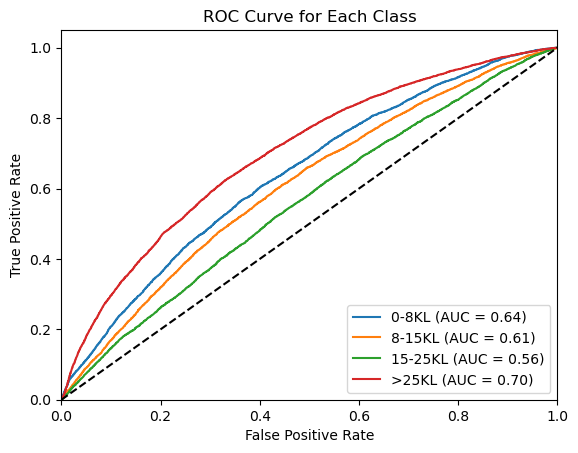

Ordinal Random Forest Model with Over-Sampling
              precision    recall  f1-score   support

       0-8KL       0.72      0.73      0.73      9188
      8-15KL       0.59      0.56      0.57      9188
     15-25KL       0.50      0.46      0.48      9188
       >25KL       0.55      0.60      0.57      9188

    accuracy                           0.59     36752
   macro avg       0.59      0.59      0.59     36752
weighted avg       0.59      0.59      0.59     36752

ROC-AUC Score: 0.8078440065032173


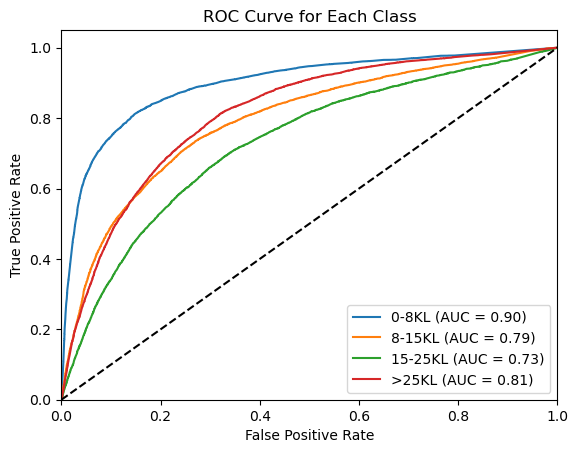

Ordinal Gradient Boosting Model with Over-Sampling
              precision    recall  f1-score   support

       0-8KL       0.52      0.49      0.51      9188
      8-15KL       0.36      0.35      0.36      9188
     15-25KL       0.33      0.26      0.29      9188
       >25KL       0.52      0.68      0.59      9188

    accuracy                           0.45     36752
   macro avg       0.43      0.45      0.44     36752
weighted avg       0.43      0.45      0.44     36752

ROC-AUC Score: 0.7133050976641878


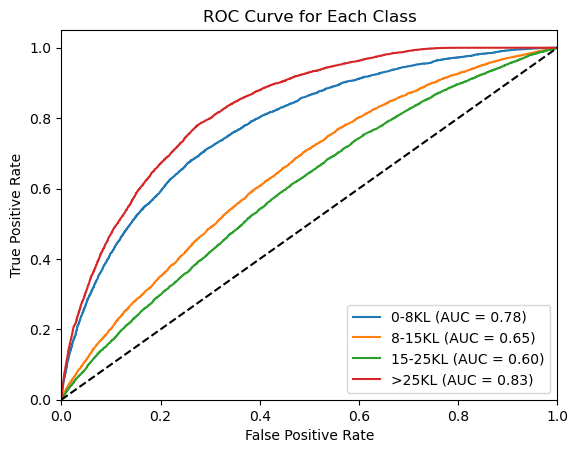

Ordinal LightGBM Model with Over-Sampling
              precision    recall  f1-score   support

       0-8KL       0.63      0.64      0.63      9188
      8-15KL       0.45      0.42      0.44      9188
     15-25KL       0.41      0.30      0.34      9188
       >25KL       0.55      0.72      0.62      9188

    accuracy                           0.52     36752
   macro avg       0.51      0.52      0.51     36752
weighted avg       0.51      0.52      0.51     36752

ROC-AUC Score: 0.7679572419247103


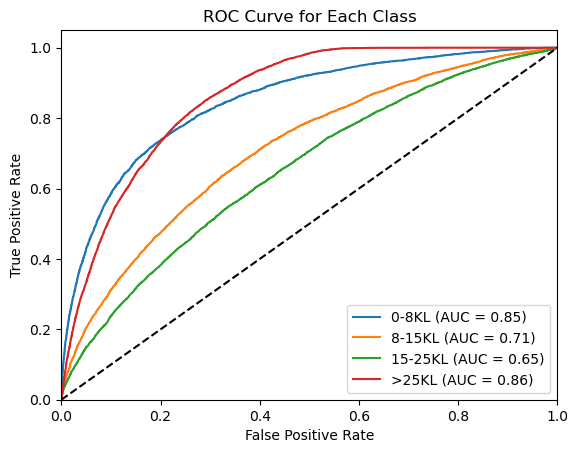

In [12]:
from sklearn.utils.class_weight import compute_class_weight
from imblearn.over_sampling import SMOTE

# Apply SMOTE to balance the training dataset
smote = SMOTE(random_state=123)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train_processed, y_train)

print(f"Original training set size: {X_train_processed.shape}, {y_train.shape}")
print(f"Balanced training set size: {X_train_balanced.shape}, {y_train_balanced.shape}")

# Train and evaluate the ordinal logistic regression model
print("Ordinal Logistic Regression Model with Over-Sampling")
ordinal_logistic_model = OrdinalClassifier(clf=LogisticRegression(max_iter=1000, multi_class='ovr', solver='lbfgs'))
cross_val_evaluate_model(ordinal_logistic_model, X_train_balanced, y_train_balanced, cv=5, class_labels=labels)

# Train and evaluate the ordinal random forest model
print("Ordinal Random Forest Model with Over-Sampling")
ordinal_rf_model = OrdinalClassifier(clf=RandomForestClassifier(n_estimators=100, random_state=123))
cross_val_evaluate_model(ordinal_rf_model, X_train_balanced, y_train_balanced, cv=5, class_labels=labels)

# Train and evaluate the ordinal gradient boost model
print("Ordinal Gradient Boosting Model with Over-Sampling")
ordinal_gb_model = OrdinalClassifier(clf=GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=123))
cross_val_evaluate_model(ordinal_gb_model, X_train_balanced, y_train_balanced, cv=5, class_labels=labels)

# Train and evaluate the ordinal LightGBM model
print("Ordinal LightGBM Model with Over-Sampling")
ordinal_lgb_model = OrdinalClassifier(clf=LGBMClassifier(objective='binary', random_state=123, learning_rate=0.1, verbosity=-1, n_jobs=-1))
cross_val_evaluate_model(ordinal_lgb_model, X_train_balanced, y_train_balanced, cv=5, class_labels=labels)